# Self-attention example

In [1]:
# !pip install bertviz

In [2]:
# Load model and retrieve attention weights

from bertviz import head_view, model_view
from transformers import BertTokenizer, BertModel

model_version = 'bert-base-uncased'
model = BertModel.from_pretrained(model_version, output_attentions=True)

# Convert inputs and outputs to subwords
tokenizer = BertTokenizer.from_pretrained(model_version)
sentence_a = "Peter loves animals, he likes cats more than dogs"
sentence_b = "He likes apples but hates oranges"
inputs = tokenizer.encode_plus(sentence_a, sentence_b, return_tensors='pt')
input_ids = inputs['input_ids']
token_type_ids = inputs['token_type_ids']

# Get normalized attention weights for each layer
attention = model(input_ids, token_type_ids=token_type_ids)[-1]
sentence_b_start = token_type_ids[0].tolist().index(1)
input_id_list = input_ids[0].tolist() # Batch index 0
tokens = tokenizer.convert_ids_to_tokens(input_id_list) 

/Users/sanketkhandare/miniconda/envs/nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect t

## Display Attention

The head view visualizes attention in one or more heads from a single Transformer layer. Each line shows the attention from one token (left) to another (right). Line weight reflects the attention value (ranges from 0 to 1), while line color identifies the attention head. When multiple heads are selected (indicated by the colored tiles at the top), the corresponding visualizations are overlaid onto one another.

In [3]:
# head view 
head_view(attention, tokens, sentence_b_start)

<IPython.core.display.Javascript object>

# Positional encoding example

Here is a short Python code to implement positional encoding using NumPy. The code is simplified to make the understanding of positional encoding easier.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def getPositionEncoding(seq_len, d, n=10000):
    P = np.zeros((seq_len, d))
    for k in range(seq_len):
        for i in np.arange(int(d/2)):
            denominator = np.power(n, 2*i/d)
            P[k, 2*i] = np.sin(k/denominator)
            P[k, 2*i+1] = np.cos(k/denominator)
    return P

# n : User-defined scalar
# d: Dimension of the output embedding space
P = getPositionEncoding(seq_len=4, d=4, n=100)
print(P)

[[ 0.          1.          0.          1.        ]
 [ 0.84147098  0.54030231  0.09983342  0.99500417]
 [ 0.90929743 -0.41614684  0.19866933  0.98006658]
 [ 0.14112001 -0.9899925   0.29552021  0.95533649]]


Positional Encoding Heatmap

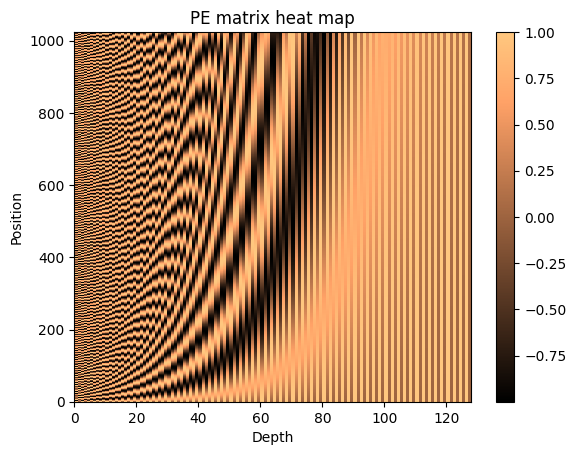

In [5]:
# Positional Encoding
def positional_encoding(max_position, d_model, min_freq=1e-4):
    position = np.arange(max_position)
    freqs = min_freq**(2*(np.arange(d_model)//2)/d_model)
    pos_enc = position.reshape(-1,1)*freqs.reshape(1,-1)
    pos_enc[:, ::2] = np.cos(pos_enc[:, ::2])
    pos_enc[:, 1::2] = np.sin(pos_enc[:, 1::2])
    return pos_enc
    
# Heatmap Plotting
d_model = 128
max_pos = 1024
mat = positional_encoding(max_pos, d_model)
plt.pcolormesh(mat, cmap='copper')
plt.xlabel('Depth')
plt.xlim((0, d_model))
plt.ylabel('Position')
plt.title("PE matrix heat map")
plt.colorbar()
plt.show()